In [2]:
%reset -f
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"]=(10,5)
import numpy as np

#import statistics
stats_sum3 = pd.read_csv('Clean ExecuComp Merge/statistics_sum3.csv', index_col=0)
#stats_sum2 = pd.read_csv('Clean ExecuComp Merge/statistics_sum2.csv', index_col=0)
hist_sum3 = pd.read_csv('Clean ExecuComp Merge/stats_histograms_sum3.csv', index_col=0)
#hist_sum2 = pd.read_csv('Clean ExecuComp Merge/stats_histograms_sum2.csv', index_col=0)



# Sample 3
* Merged BoardEx and ExecuComp datasets -- 15,000+ executives
* Can see the aggregate number of options executive spent each year.
* Options awarded beyond 2021.

## Important 

I don't look at the "spread out" and "median" option exercising assumptions from the previous samples.

In contrast to Samples 1 and 2 where I only account for options awarded after 1999, executives in this sample potentially could spend options acquired prior to 1999. I am currently working on dealing with a way to create an "initial" stock for each executive when they appear in the sample. 

With all of that said, there are some executives whose ratio in some years is greater than 1 and affects the average ratio in sum 2. **Therefore I have excluded sum 2 for now until I can fix this problem**

# Guide

See the *BoardEx Progress Summary.pdf* for more details on what is going on. 

### The plots look at 
* *Ratio = Options Exercised / (Options Exercised + Exercisable Options + UnExercisable Options)* with appreviated name for the ratio as **sum 3**
* *Ratio = Options Exercised / (Options Exercised + Exercisable Options)* with appreviated name for the ratio as **sum 2**

Important: The ratio is the average ratio, not the aggregate ratio.

### How do I define *Options Exercised*?
I use the variable "OPT_EXER_NUM" from ExecuComp which is the number of options exercised in a given year. Note that I do not know from which packages these options come from.

### How do I count executives? 
* I count executatives according to their id and company id number. Note that there are several executives who simultaneously employed by different companies at the same time. 

### How do executives enter and leave the sample?
* An executive enters the sample when they are awarded their first option package. 
* An executive leaves the sample when they end up exercising all the options that they have. It is possible for someone who exercises all their options to be awarded more and reenter the sample. 
* There is information whether an executive leaves a company or not. Typically when an executive leaves they still can hold their optoins for a a 3 month - to one year period. Usually executives will exercise them all within three months of leaving. I assume that when an executive leaves they trigger all the options that they can.


# Number of executives per year 

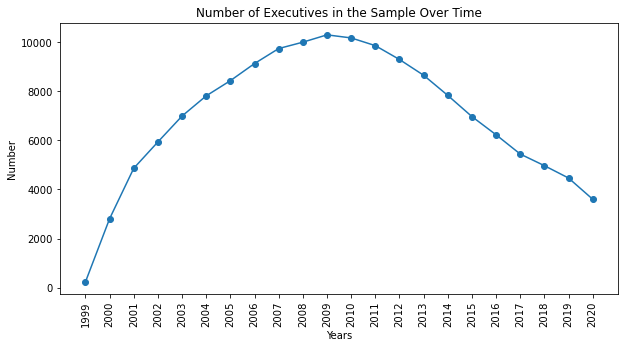

In [5]:
number_exec_sum3 = stats_sum3[stats_sum3.index == 'number_exec_ec']
plt.plot(number_exec_sum3.columns, number_exec_sum3.T, marker='o')
#plt.plot(number_exec_sum2.columns, number_exec_sum2.T, marker='o')
plt.title('Number of Executives in the Sample Over Time')
plt.xticks(rotation=90)
#plt.legend(['Sum 3', 'Sum 2'])
plt.ylabel('Number')
plt.xlabel('Years')
plt.show()



# Histogram of Options by Number of Years Before Expiration

Duration = Year Option Expires - Year Option Awarded 

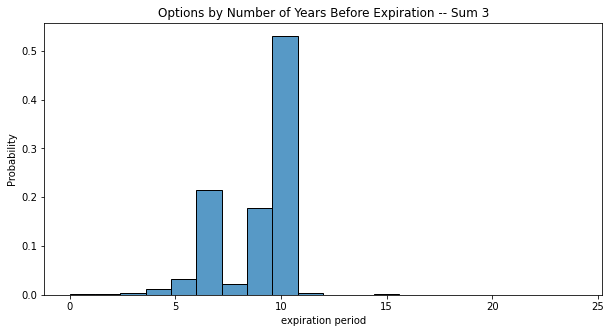

In [6]:
sns.histplot(data=hist_sum3['expiration period'], bins=20, stat="probability")
plt.title('Options by Number of Years Before Expiration -- Sum 3')
plt.show()

#sns.histplot(data=hist_sum2['expiration period'], bins=20, stat="probability")
#plt.title('Options by Number of Years Before Expiration -- Sum 2')
#plt.show()

# Histogram of Vesting Periods
Vesting Period = Year Option Expires - Year Option Becomes Exercisable

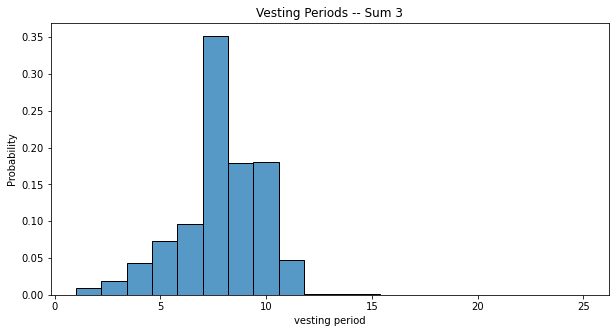

In [7]:
sns.histplot(data=hist_sum3['vesting period'], bins=20, stat="probability")
plt.title('Vesting Periods -- Sum 3')
plt.show()

#sns.histplot(data=hist_sum2['vesting period'], bins=20, stat="probability")
#plt.title('Vesting Periods -- Sum 2')
#plt.show()

# Sum 3 Ratio 

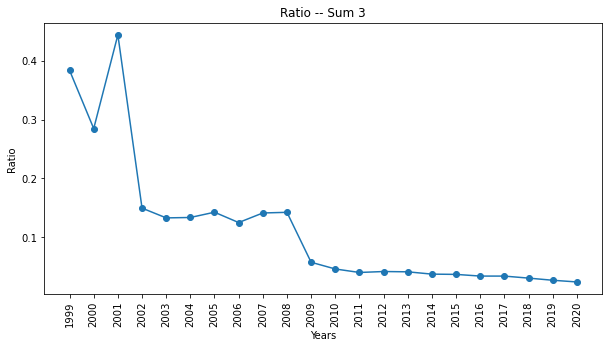

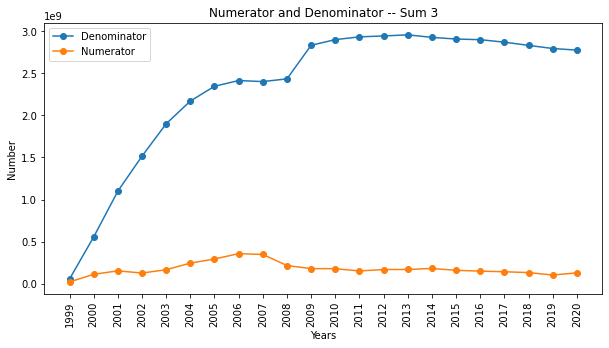

In [11]:
ratio_avg_sum3_spread = pd.read_csv('Clean ExecuComp Merge/ratio_avg_ec_sum3.csv', index_col=0)
plt.plot(ratio_avg_sum3_spread.columns, ratio_avg_sum3_spread.T, marker='o')
plt.title('Ratio -- Sum 3')
plt.ylabel('Ratio')
plt.xlabel('Years')
plt.xticks(rotation=90)
plt.show()

denominator_spread_sum3 = stats_sum3[stats_sum3.index == 'denominator_total_stock_ec']
numerator_spread_sum3 = stats_sum3[stats_sum3.index == 'numerator_ec']
plt.plot(denominator_spread_sum3.columns, denominator_spread_sum3.T, marker='o')
plt.plot(numerator_spread_sum3.columns, numerator_spread_sum3.T, marker='o')
plt.title('Numerator and Denominator -- Sum 3')
plt.legend(['Denominator', 'Numerator'])
plt.xticks(rotation=90)
plt.ylabel('Number')
plt.xlabel('Years')
plt.show()


